![TecNM](assets/encabezado.png)

---

# Machine Learning y Deep Learning
## Unidad 1 · Introducción a Machine Learning y Deep Learning

Práctica 1 — Data Wrangling

> **Facilitador:** Dr. José Gabriel Rodríguez Rivas  
> **Alumno:** Christian Gibrán Espituñal Villanueva


---

## Objetivo

Aplicar técnicas básicas de **Data Wrangling** para cargar, explorar, limpiar y transformar un conjunto de datos crudos, con el fin de prepararlo para su posterior análisis y uso en modelos de *Machine Learning* y *Deep Learning*.

El resultado del proceso será un conjunto de datos corregido y estructurado, almacenado nuevamente en formato CSV.

---

## Conjunto de Datos

El archivo `datasets/AutosDatosSucios.csv` contiene información automotriz sin preprocesar, con valores faltantes y formatos inconsistentes. Este notebook documenta el proceso completo de *Data Wrangling* aplicado a dicho conjunto, siguiendo un flujo estructurado desde la exploración inicial hasta la generación de un dataset limpio y consistente.

---

## Contenido

1. [Carga y diagnóstico inicial del conjunto de datos](#Carga-y-diagnóstico-inicial-del-conjunto-de-datos)
2. [Tratamiento de valores faltantes](#Tratamiento-de-valores-faltantes)
3. [Corrección y normalización de tipos de datos](#Corrección-y-normalización-de-tipos-de-datos)
4. [Conversión de unidades](#Conversión-de-unidades)
5. [Normalización de variables numéricas](#Normalización-de-variables-numéricas)
6. [Discretización de variables continuas](#Discretización-de-variables-continuas)
7. [Codificación de variables categóricas](#Codificación-de-variables-categóricas)
8. [Almacenamiento del conjunto de datos limpio](#Almacenamiento-del-conjunto-de-datos-limpio)

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


### Carga y diagnóstico inicial del conjunto de datos

En esta fase se carga el conjunto de datos original y se realiza una inspección preliminar con el objetivo de comprender su estructura, tipos de datos y nivel general de calidad.

Esta exploración inicial permite detectar valores faltantes, formatos inconsistentes y posibles problemas que deberán corregirse en etapas posteriores del proceso de *Data Wrangling*.


In [ ]:
autos = pd.read_csv('datasets/AutosDatosSucios.csv')
autos.head()

In [53]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [66]:
autos = autos.replace("?", np.nan)
print(f"Nulos por columna:\n{autos.isnull().sum()}")
print(f"\nTotal nulos: {autos.isnull().sum().sum()}")


Nulos por columna:
symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
price                0
city-L/100km         0
highway-L/100km      0
fuel-type_diesel     0
fuel-type_gas        0
horsepower-binned    0
dtype: int64

Total nulos: 0


In [55]:
autos.isna().sum().sort_values()

symboling             0
city-mpg              0
compression-ratio     0
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
highway-mpg           0
width                 0
height                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
aspiration            0
fuel-type             0
make                  0
length                0
num-of-doors          2
horsepower            2
peak-rpm              2
bore                  4
stroke                4
price                 4
normalized-losses    41
dtype: int64

### Imputación de valores faltantes de forma vectorizada

En esta sección se realiza el **tratamiento de valores faltantes** mediante una estrategia de imputación aplicada de forma **compacta y vectorizada**, evitando la repetición de código para cada variable individual.

Para las variables numéricas *normalized-losses*, *bore*, *stroke*, *horsepower* y *peak-rpm*, se emplea un enfoque uniforme:
- Primero, se convierten explícitamente a tipo numérico, forzando la conversión de valores no válidos a `NaN`.
- Posteriormente, los valores faltantes se sustituyen por la **media aritmética** de cada variable, una técnica común cuando se trabaja con atributos continuos y distribuciones relativamente estables.

Este enfoque permite mantener la consistencia estadística del conjunto de datos y simplifica el mantenimiento del código, al centralizar la lógica de imputación en un solo bloque.

En el caso de la variable categórica *num-of-doors*, los valores faltantes se imputan utilizando la **moda**, es decir, la categoría más frecuente, ya que este método resulta más adecuado para variables discretas no numéricas.

Finalmente, se calculan y muestran medidas descriptivas de las variables tratadas con el objetivo de verificar que el proceso de imputación se haya realizado correctamente y que los valores resultantes sean coherentes.


In [56]:
numeric_cols = ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]

for col in numeric_cols:
    autos[col] = (
        pd.to_numeric(autos[col], errors="coerce")
        .pipe(lambda s: s.fillna(s.mean()))
    )

autos["num-of-doors"] = autos["num-of-doors"].fillna(
    autos["num-of-doors"].mode()[0]
)

print(f"Media de pérdidas normalizadas (normalized-losses): {autos['normalized-losses'].mean():,.2f}")
print(f"Diámetro medio del cilindro (bore): {autos['bore'].mean():,.4f} pulgadas")
print(f"Carrera media del pistón (stroke): {autos['stroke'].mean():,.4f} pulgadas")
print(f"Potencia media del motor (horsepower): {autos['horsepower'].mean():,.2f} hp")
print(f"Régimen medio de potencia máxima (peak RPM): {autos['peak-rpm'].mean():,.0f} rpm")
print(f"Categoría más frecuente del número de puertas (num-of-doors): {autos['num-of-doors'].mode()[0]}")


Media de pérdidas normalizadas (normalized-losses): 122.00
Diámetro medio del cilindro (bore): 3.3298 pulgadas
Carrera media del pistón (stroke): 3.2554 pulgadas
Potencia media del motor (horsepower): 104.26 hp
Régimen medio de potencia máxima (peak RPM): 5,125 rpm
Categoría más frecuente del número de puertas (num-of-doors): four


### Eliminación de registros con valores faltantes en *price*

En esta etapa se eliminan los registros que contienen valores faltantes en la variable *price*.  
Dado que el precio suele ser una **variable objetivo** o un atributo clave en análisis económicos y modelos predictivos, la ausencia de este valor limita significativamente la utilidad del registro.

A diferencia de otras variables donde puede aplicarse imputación, en el caso de *price* se opta por la eliminación directa de los registros incompletos para evitar introducir sesgos artificiales o estimaciones poco confiables.

Posteriormente, se reinicia el índice del conjunto de datos para mantener una estructura ordenada y coherente. Finalmente, se verifica el número de filas restantes y se confirma que no existen valores faltantes en la variable *price*, asegurando la consistencia del conjunto de datos resultante.


In [57]:
autos = (
    autos.dropna(subset=["price"])
         .reset_index(drop=True)
)
print(f"Filas restantes: {len(autos)}")
print(f"NaN en precio: {autos['price'].isna().sum()}")
autos.head()



Filas restantes: 201
NaN en precio: 0


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


### Normalización semántica de tipos de datos

En esta etapa se realiza una **normalización semántica de los tipos de datos**, asegurando que cada variable numérica sea representada mediante el tipo adecuado según su naturaleza y uso posterior.

Durante la carga inicial del conjunto de datos, algunas columnas pueden ser interpretadas incorrectamente como texto debido a valores faltantes, símbolos o formatos inconsistentes. Esto puede provocar errores silenciosos en cálculos, visualizaciones o durante el entrenamiento de modelos de *Machine Learning*.

Por esta razón, se definen explícitamente los tipos de datos esperados para cada variable:
- Variables de medición continua como *bore*, *stroke*, *price*, *peak-rpm* y *horsepower* se representan como valores de tipo `float`.
- La variable *normalized-losses*, al corresponder a un conteo discreto, se convierte a tipo `int`.

Este proceso garantiza consistencia numérica, mejora la interpretabilidad del conjunto de datos y asegura su compatibilidad con algoritmos de aprendizaje automático. Finalmente, se valida el resultado verificando los tipos de datos asignados a cada columna.


In [58]:
autos = autos.astype({
    "bore": "float",
    "stroke": "float",
    "normalized-losses": "int",
    "price": "float",
    "peak-rpm": "float",
    "horsepower": "float"
})

print(autos.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object


### Conversión de consumo de combustible a L/100 km

En esta sección se realiza la **conversión de unidades** de las variables *city-mpg* y *highway-mpg* (millas por galón) a **litros por cada 100 kilómetros (L/100 km)**, una unidad de medida más común y comprensible en el contexto del sistema métrico.

La conversión se efectúa utilizando el factor estándar `235 / mpg`, el cual permite transformar directamente los valores de consumo expresados en millas por galón a litros por 100 kilómetros. Este cambio facilita la interpretación de los datos y asegura coherencia con otras variables del conjunto de datos.

Posteriormente, las columnas originales en millas por galón se eliminan del conjunto de datos, conservando únicamente las nuevas variables convertidas. Finalmente, se muestran las primeras filas del resultado para verificar que la transformación se realizó correctamente.


In [59]:
autos = (
    autos
    .assign(
        **{"city-L/100km": 235 / autos["city-mpg"],
           "highway-L/100km": 235 / autos["highway-mpg"]}
    )
    .drop(columns=["city-mpg", "highway-mpg"])
)

print(autos[["city-L/100km", "highway-L/100km"]].head())


   city-L/100km  highway-L/100km
0     11.190476         8.703704
1     11.190476         8.703704
2     12.368421         9.038462
3      9.791667         7.833333
4     13.055556        10.681818


### Normalización de variables numéricas

En esta sección se aplica un proceso de **normalización** a las variables numéricas *length*, *width* y *height*.  
La normalización consiste en escalar los valores de las variables a un rango común, en este caso entre **0 y 1**, dividiendo cada valor entre el máximo de su respectiva variable.

Este procedimiento es especialmente útil cuando se trabaja con variables que presentan diferentes escalas de magnitud, ya que evita que aquellas con valores más grandes tengan una influencia desproporcionada durante el entrenamiento de modelos de *Machine Learning*.

La selección de estas variables se basa en su naturaleza continua y en su relevancia para el análisis de características físicas de los automóviles. Finalmente, se visualizan las primeras filas de los datos normalizados para verificar que la transformación se realizó correctamente.


In [60]:
cols_normalizar = ["length", "width", "height"]

autos[cols_normalizar] = autos[cols_normalizar] / autos[cols_normalizar].max()

print(autos[cols_normalizar].head())

     length     width    height
0  0.811148  0.890278  0.816054
1  0.811148  0.890278  0.816054
2  0.822681  0.909722  0.876254
3  0.848630  0.919444  0.908027
4  0.848630  0.922222  0.908027


### Creación de variables dummy para la variable *fuel-type*

En esta sección se realiza la **codificación de variables categóricas** mediante la técnica de *variables dummy* o *one-hot encoding*.  
Dado que los modelos de *Machine Learning* requieren datos numéricos para su procesamiento, es necesario transformar la variable categórica *fuel-type* en un conjunto de variables binarias.

Para ello, se utiliza la función `get_dummies` de *pandas*, la cual genera una nueva columna por cada categoría presente en la variable original. En este caso, se crean las columnas **fuel-type_diesel** y **fuel-type_gas**, donde el valor `1` indica la presencia de la categoría correspondiente y `0` su ausencia.

El uso de esta técnica permite conservar la información categórica original sin introducir relaciones ordinales artificiales entre las categorías, lo que resulta adecuado para algoritmos de aprendizaje automático.

Finalmente, se muestran las primeras filas del conjunto de datos transformado y se verifica la distribución de las nuevas variables dummy para confirmar que la codificación se realizó correctamente.


In [61]:
autos = pd.get_dummies(autos, columns=["fuel-type"], dtype=int)

print(autos[["fuel-type_diesel", "fuel-type_gas"]].head())
print(autos[["fuel-type_diesel", "fuel-type_gas"]].value_counts())

   fuel-type_diesel  fuel-type_gas
0                 0              1
1                 0              1
2                 0              1
3                 0              1
4                 0              1
fuel-type_diesel  fuel-type_gas
0                 1                181
1                 0                 20
Name: count, dtype: int64


### Discretización de la variable *horsepower*

En esta sección se realiza la **discretización** de la variable *horsepower*, transformando un valor numérico continuo en categorías ordinales.  
Este proceso permite analizar la distribución de la potencia del motor en rangos representativos y facilita su interpretación en etapas posteriores del análisis.

Se definieron tres contenedores (*bins*) que agrupan los valores en niveles **bajo**, **medio** y **alto**, utilizando el rango completo de la variable. Posteriormente, se evaluó la distribución de los datos discretizados y se comparó visualmente con la distribución original mediante gráficos.


horsepower-binned
Bajo     153
Medio     43
Alto       5
Name: count, dtype: int64


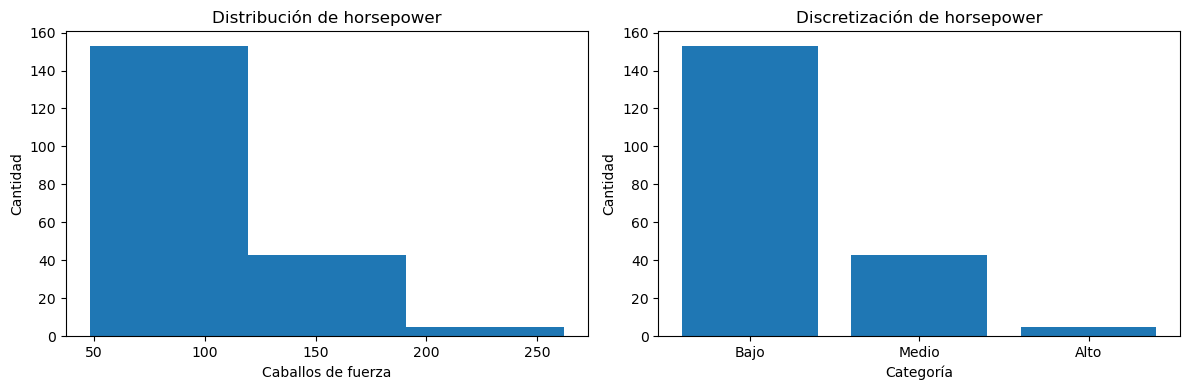

In [65]:
autos["horsepower"] = autos["horsepower"].astype(int)

bins   = np.linspace(autos["horsepower"].min(), autos["horsepower"].max(), 4)
grupos = ["Bajo", "Medio", "Alto"]

autos["horsepower-binned"] = pd.cut(
    autos["horsepower"],
    bins,
    labels=grupos,
    include_lowest=True
)

conteo = autos["horsepower-binned"].value_counts()
print(conteo)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(autos["horsepower"], bins=3)
ax1.set(
    xlabel="Caballos de fuerza",
    ylabel="Cantidad",
    title="Distribución de horsepower"
)

ax2.bar(grupos, conteo[grupos])
ax2.set(
    xlabel="Categoría",
    ylabel="Cantidad",
    title="Discretización de horsepower"
)

plt.tight_layout()
plt.show()


### Almacenamiento del conjunto de datos limpio

Una vez concluido el proceso de limpieza y transformación de los datos, el conjunto resultante se exporta a un nuevo archivo en formato CSV. Este archivo corresponde a la versión procesada del dataset original y conserva únicamente información estructurada y consistente, adecuada para su uso en análisis posteriores o en la construcción de modelos de *Machine Learning*.

El archivo generado se guarda en la siguiente ruta del repositorio:

```
datasets/AutosDatosLimpios.csv
```
También puede consultarse directamente desde el repositorio:
[datasets/AutosDatosLimpios.csv](datasets/AutosDatosLimpios.csv)


In [63]:
autos.to_csv('datasets/AutosDatosLimpios.csv', index=False)

print(f"Archivo guardado exitosamente: {autos.shape[0]} filas x {autos.shape[1]} columnas")

Archivo guardado exitosamente: 201 filas x 28 columnas
